<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-regression?" data-toc-modified-id="What-is-regression?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is regression?</a></span></li><li><span><a href="#Prediction-using-linear-regression" data-toc-modified-id="Prediction-using-linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction using linear regression</a></span><ul class="toc-item"><li><span><a href="#Simple-linear-regression" data-toc-modified-id="Simple-linear-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple linear regression</a></span></li><li><span><a href="#Multiple-linear-regression" data-toc-modified-id="Multiple-linear-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multiple linear regression</a></span></li><li><span><a href="#TensorFlow-Estimators" data-toc-modified-id="TensorFlow-Estimators-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>TensorFlow Estimators</a></span><ul class="toc-item"><li><span><a href="#Feature-columns" data-toc-modified-id="Feature-columns-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Feature columns</a></span></li></ul></li></ul></li></ul></div>

# What is regression?

Regression is normally the first algorithm that people in machine learning work
with. It allows us to make predictions from data by learning about the relationship
between a given set of dependent and independent variables. It has its use in almost
every field; anywhere that has an interest in drawing relationships between two or
more things will find a use for regression.

Consider the case of house price estimation. There are many factors that can have
an impact on the house price: the number of rooms, the floor area, the locality, the
availability of amenities, the parking space, and so on. Regression analysis can
help us in finding the mathematical relationship between these factors and the
house price. Let us imagine a simpler world where only the area of the house determines its
price. Using regression we could determine the relationship between the area of the
house (independent variable: these are the variables that do not depend upon any
other variables) and its price (dependent variable: these variables depend upon one
or more independent variables). 
# Prediction using linear regression
## Simple linear regression

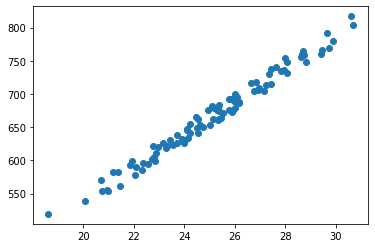

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [7]:
W = sum(price*(area-np.mean(area))) / sum((area-np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)
print("The regression coefficients are", W,b)

The regression coefficients are 24.815544052284988 43.4989785533412


In [8]:
y_pred = W * area + b
y_pred

array([773.32737662, 688.71287694, 724.60736876, 802.91003961,
       779.7487488 , 603.25837416, 722.82998231, 654.49755119,
       657.48399995, 689.36064289, 672.82387882, 754.10905055,
       711.10149285, 671.43615919, 691.42434887, 684.58835479,
       756.5785425 , 651.15979503, 683.30994321, 610.90045375,
       505.50300176, 704.43733248, 717.51621629, 617.84450797,
       804.70056951, 573.6603912 , 666.72638612, 652.27490717,
       758.97945515, 755.04492307, 673.50034153, 687.34835152,
       608.81036404, 541.00122482, 642.30350669, 673.58729169,
       740.21341132, 738.48185512, 639.85826561, 645.1330618 ,
       598.83654912, 575.79128567, 558.03252216, 784.91146175,
       632.26933944, 636.70994954, 586.16558375, 712.1221953 ,
       563.76319703, 650.68941537, 608.33385512, 687.89056981,
       632.19781138, 590.64250492, 662.13918654, 690.46080087,
       668.01423252, 682.65259162, 624.53496021, 641.3835314 ,
       622.1689002 , 641.58131156, 613.4409114 , 556.79

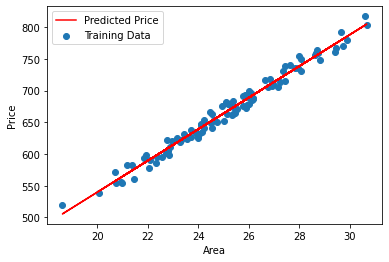

In [9]:
plt.plot(area, y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

## Multiple linear regression

## TensorFlow Estimators
TensorFlow provides Estimators as higher-level APIs, to provide scalable and
production-oriented solutions. They take care of all behind-the-scene activities such
as creating computational graphs, initializing the variables, training the model,
saving checkpoints, and logging TensorBoard files. TensorFlow provides two types
of Estimators:

    • Canned Estimators: These are premade Estimators available in the TensorFlow estimator module. These are models in a box; you just pass them the input features and they are ready to use. Some examples are Linear Classifier, Linear Regressor, DNN Classifier, and so on.

    • Custom Estimators: Users can also create their own estimators from the models they build in TensorFlow Keras. These are user-defined Estimators.

### Feature columns
The feature_column module of TensorFlow 2.0 acts as a bridge between your input
data and the model. The input parameters to be used by the estimators for training
are passed as feature columns. They are defined in TensorFlow feature_column and
specify how the data is interpreted by the model. To create feature columns we will
need to call functions from tensorflow.feature_columns. There are nine functions
available in feature column:

- categorical_column_with_identity: Here each category is one-hot encoded, and thus has a unique identity. This can be used for numeric values only.
- categorical_column_with_vocabulary_file: This is used when the categorical input is a string and the categories are given in a file. The string is first converted to a numeric value and then one-hot encoded.
- categorical_column_with_vocabulary_list: This is used when the categorical input is a string and the categories are explicitly defined in a list. The string is first converted to a numeric value and then one-hot encoded.
- categorical_column_with_hash_bucket: In case the number of categories is very large, and it is not possible to one-hot encode, we use hashing.
- crossed_column: When we want to use two columns combined as one eature, for example, in the case of geolocation-based data it makes sense to ombine longitude and latitude values as one feature.
- numeric_column: Used when the feature is a numeric, it can be a single value or even a matrix.
- indicator_column: We do not use this directly. Instead, it is used with the categorical column, but only when the number of categories is limited and can be represented as one-hot encoded.
- embedding_column: We do not use this directly. Instead, it is used with the categorical column, but only when the number of categories is very large and cannot be represented as one-hot encoded.
-  bucketized_column: This is used when, instead of a specific numeric value, we split the data into different categories depending upon its value.